# Object detection using yolov5 and common objects datasets from roboflow
<p> by Abdulhameed Yunusa </p> - <a href="https://github.com/ayhameed">Github</a>

## Connect to gdrive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Verify connection
!ls "/content/drive/My Drive"

 01CS059.pdf
'0-care terms and conditions.gdoc'
 0FF2A9A8-CE0D-4D34-91A4-BF5C3D930EAF.jpeg
 0-simple_web_stack.png
 0to1.pdf
 16G928.pdf
 16G932.pdf
 17-short-specializations-certificate-abdulhameed-yunusa.png
'17TH JULY.docx'
'17TH JULY.gdoc'
 1-distributed_web_infrastructure.png
 1.docx
 1F109460-A4F9-4749-BE83-8B1C3B762BAF.pdf
 1st_UTME_Admission_Office_1_11_2017.pdf
 20150928_171946.jpg
 2017-2018-Session-Student-Resumption-Instructions-Payment-Details-Only.pdf
 2019_FieldStudy_Research.pdf
 2019_Guidelines_Research_E.pdf
 2019_HealthCertificate.pdf
 2019_Placement_Research.pdf
'2023 Certifications'
'2023 thesis.gdoc'
 2024-01-12_-_Worker_and_Temporary_Worker.csv
 22034674_ELE7038B_Lab.zip
 2-secured_and_monitored_web_infrastructure.png
 3-scale_up.png
 4_5868719158081881007
'50 + Life switch Introductory Module.gslides'
'5391cb32-3ee1-4de7-9cca-ac09c242cf95 (1).gdoc'
 5391cb32-3ee1-4de7-9cca-ac09c242cf95.gdoc
 5391cb32-3ee1-4de7-9cca-ac09c242cf95.jpg
 5b6da301-e8f9-420d-b46e-df809

# Setting Roboflow API Key

## Store API key

In [9]:
# Store API key securely
import os
os.environ['ROBOFLOW_API_KEY'] = 'place-your-api-key-here'

In [10]:
# Get API key
api_key = os.environ.get('ROBOFLOW_API_KEY')

## Initialize Roboflow

In [6]:
# Install roboflow if not already installed
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [7]:
# Import Roboflow
from roboflow import Roboflow

In [11]:
# Create an Instance of the Roboflow
rf = Roboflow(api_key=api_key)

In [12]:
# Test the connection
workspace = rf.workspace()
print("Successfully connected to Roboflow!")

loading Roboflow workspace...
Successfully connected to Roboflow!


## Seting up the Enviroment

In [28]:
# Install required packages
!pip install torch torchvision
!pip install opencv-python-headless

In [65]:
%matplotlib inline

In [29]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 17022, done.
remote: Total 17022 (delta 0), reused 0 (delta 0), pack-reused 17022 (from 1)
Receiving objects: 100% (17022/17022), 15.61 MiB | 21.69 MiB/s, done.
Resolving deltas: 100% (11690/11690), done.


In [30]:
# Install YOLOv5 requirements
%cd yolov5
!pip install -r requirements.txt

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.1/877.1 kB 16.1 MB/s eta 0:00:00


In [51]:
# Import all necessary libraries
import torch
import cv2
from IPython.display import display, Image
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg
from pathlib import Path
import numpy as np
import os

## Load Pre-trained Model

In [32]:
# Load YOLOv5s (small model) with pre-trained weights
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


YOLOv5 🚀 2024-10-24 Python-3.10.12 torch-2.5.0+cu121 CPU

100%|██████████| 14.1M/14.1M [00:00<00:00, 111MB/s] 

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


## Object detection function

In [69]:
def detect_and_display_objects(image_path):
    """
    Detect objects in an image and display results
    """
    # Load model
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

    # Perform inference
    results = model(image_path)

    # Get prediction results
    result_image = results.render()[0]  # returns RGB numpy array

    # Convert from RGB to BGR (for cv2)
    result_image = cv2.cvtColor(result_image, cv2.COLOR_RGB2BGR)

    # Display using matplotlib
    plt.figure(figsize=(15,10))
    plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print detected objects with confidence
    df = results.pandas().xyxy[0]
    if len(df) > 0:
        print("\nDetected objects:")
        for idx, row in df.iterrows():
            print(f"{row['name']} (Confidence: {row['confidence']:.2%})")
    else:
        print("\nNo objects detected")

    return results

Please upload an image...


Saving dog.jpg to dog (1).jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-24 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


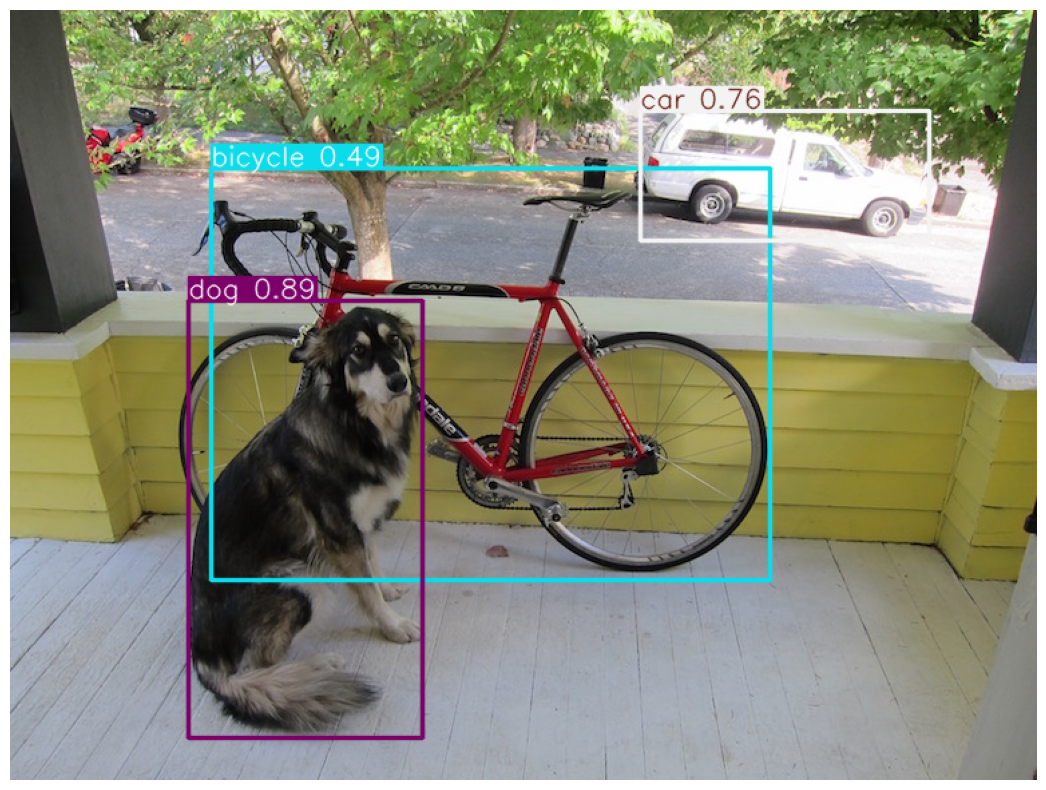


Detected objects:
dog (Confidence: 89.29%)
car (Confidence: 75.92%)
bicycle (Confidence: 48.55%)


In [70]:
# For new image upload
print("Please upload an image...")
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Detect and display
results = detect_and_display_objects(filename)


In [73]:
# Optional: Save the results
save_path = 'detection_result_2.jpg'
cv2.imwrite(save_path, cv2.cvtColor(results.render()[0], cv2.COLOR_RGB2BGR))
print(f"\nResults saved as '{save_path}'")


Results saved as 'detection_result_2.jpg'


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-10-24 Python-3.10.12 torch-2.5.0+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
`torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.


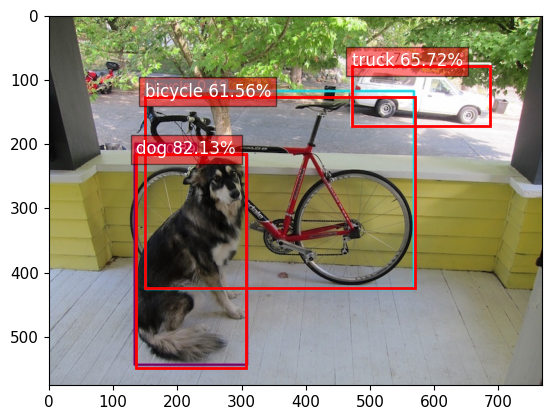


Detailed Detection Results:
Object 1:
- Class: dog
- Confidence: 82.13%
- Bounding Box: (136, 216) to (307, 548)

Object 2:
- Class: truck
- Confidence: 65.72%
- Bounding Box: (472, 78) to (687, 171)

Object 3:
- Class: bicycle
- Confidence: 61.56%
- Bounding Box: (149, 126) to (570, 423)



In [76]:
def display_with_confidence(image_path, confidence_threshold=0.25):

    # Load model
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

    # Set confidence threshold
    model.conf = confidence_threshold

    # Perform inference
    results = model(image_path)

    # Get results as pandas dataframe
    df = results.pandas().xyxy[0]

    # Load the image
    img = Image.open(image_path)

    # Plot the image with bounding boxes
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Add bounding boxes
    for idx, row in df.iterrows():
        xmin, ymin, xmax, ymax = row['xmin'], row['ymin'], row['xmax'], row['ymax']
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(xmin, ymin, f"{row['name']} {row['confidence']:.2%}", color='white', fontsize=12,
                bbox=dict(facecolor='red', alpha=0.5))

    # Display the result
    plt.show()

    # Print detailed results
    print("\nDetailed Detection Results:")
    for idx, row in df.iterrows():
        print(f"Object {idx+1}:")
        print(f"- Class: {row['name']}")
        print(f"- Confidence: {row['confidence']:.2%}")
        print(f"- Bounding Box: ({row['xmin']:.0f}, {row['ymin']:.0f}) to ({row['xmax']:.0f}, {row['ymax']:.0f})")
        print()

# Example usage
display_with_confidence('detection_result_2.jpg', confidence_threshold=0.25)